In [2]:
# prepare environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [3]:
# Load the data from a CSV file
df = pd.read_csv("/Users/davidhu/Data/CEGE0004Dataset/adult.csv", header=None)

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

print(df.info()) # The output reflet the original dataset contains 32561 samples, with 14 variables, one label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
# Load the dataset main structure
def print_col_info(dataset):
    # Prints basic information about the values in each column of the dataset
    col_num = dataset.shape[1]
    
    for i in range(col_num):
        print(f'\nValues composition for column {i}:')
        unique_vals = np.sort(np.unique(dataset[:, i]))
        print(f'Values: {unique_vals}')
        print(f"Number of unique values: {len(unique_vals)}")
        
print_col_info(df.values) # Leading whitespaces can be found for all object type variables


Values composition for column 0:
Values: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
Number of unique values: 73

Values composition for column 1:
Values: [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
Number of unique values: 9

Values composition for column 2:
Values: [12285 13769 14878 ... 1366120 1455435 1484705]
Number of unique values: 21648

Values composition for column 3:
Values: [' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college' '10th' '11th'
 '12th' '1st-4th' '5th-6th' '7th-8th' '9th']
Number of unique values: 16

Values composition for column 4:
Values: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16]
Number of unique values: 16

Values composition for colu

In [5]:
# Eliminate whitespaces in front of all object type variables
stripped_cols = [1,3,5,6,7,8,9,13,14]

for col in stripped_cols:
    df.iloc[:,col] = df.iloc[:,col].apply(lambda x: x.strip())

In [6]:
# Handling '?' data values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

if '?' in df.values:
    print("The '?' string exists in one or more rows")
else:
    print("The '?' string does not exist in any rows")

print(df.info()) # The output reflet the original dataset after handing '?' contains 30162 samples, with 14 variables, one label

The '?' string does not exist in any rows
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  int64 
 3   education        30162 non-null  object
 4   educational-num  30162 non-null  int64 
 5   marital-status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   sex              30162 non-null  object
 10  capital-gain     30162 non-null  int64 
 11  capital-loss     30162 non-null  int64 
 12  hours-per-week   30162 non-null  int64 
 13  native-country   30162 non-null  object
 14  income           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
# Removal of duplicate samples
print("Before removing duplicates:", df.duplicated().sum())
df = df[~df.duplicated()]
print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 23
After removing duplicates: 0


In [8]:
# List the income variable to view the distribution
income_counts = df['income'].value_counts()

print(income_counts) # The output reflet a significant variation between '<=50K' and '>50K' values sample size, which may affect accuracy at a later stage

<=50K    22633
>50K      7506
Name: income, dtype: int64


<AxesSubplot:xlabel='income', ylabel='count'>

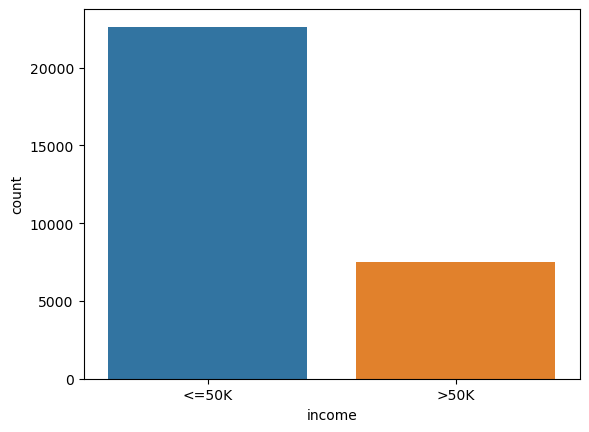

In [9]:
# Visualise the income variable distribution
sns.countplot(x='income', data=df)

In [12]:
# Apply data normalisation to int64 variables
# Different evaluation indicators often have different scales, and values can vary considerably, especially fnlwgt, capital-gain and capital-loss in this dataset, which may affect the results of the data analysis and therefore needs to be standardised to eliminate the effects of differences in scale and range of values between indicators.
# Due to the extreme values in the fnlwgt variable, therefore apply the z-score normalisation.
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] # Select the columns to be normalized
scaler = StandardScaler()

for col in numeric_cols:
    df[col] = scaler.fit_transform(df[[col]])

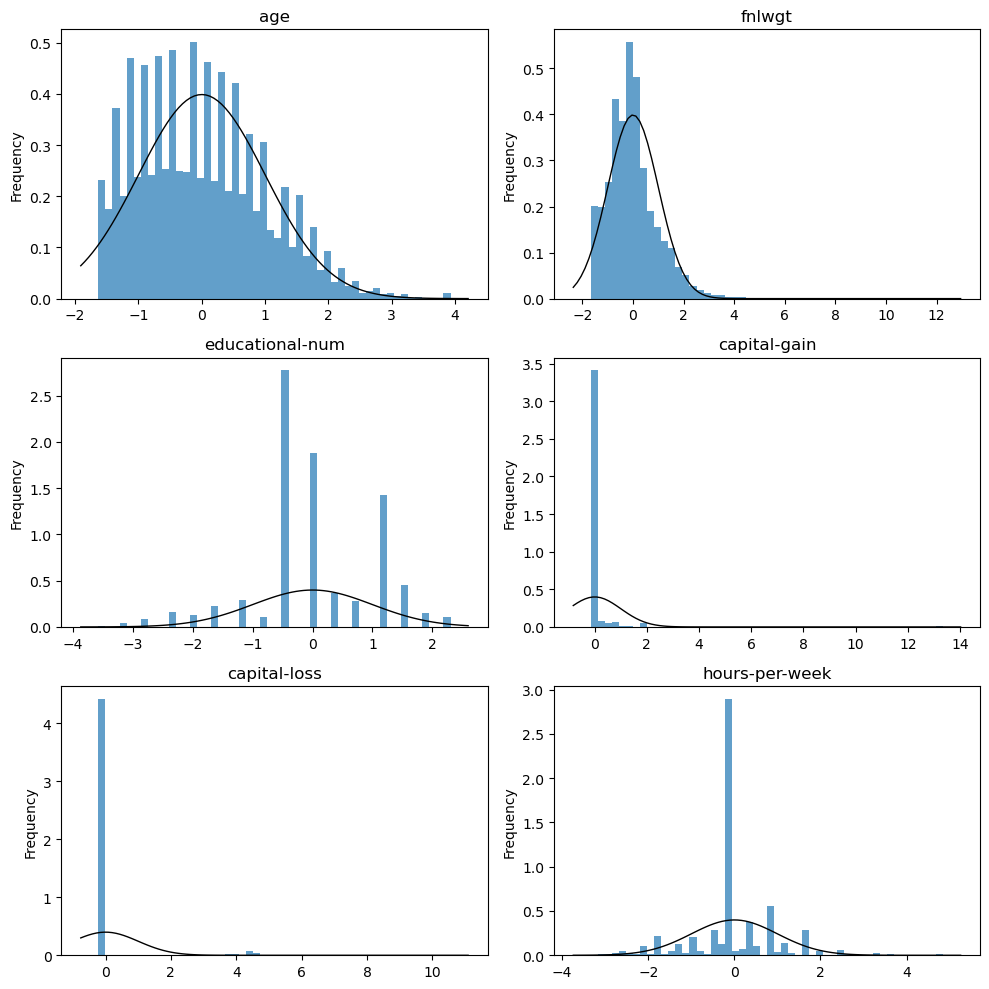

In [13]:
# Plot the histogram graph
cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate the number of rows and columns needed for the subplots
num_plots = len(cols)
num_rows = math.ceil(num_plots / 2)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate over the columns to plot and create subplots
for i, col in enumerate(cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    # Create a histogram of the selected column
    axs[row_idx, col_idx].hist(df[col], bins=50, density=True, alpha=0.7)
    # Add a fitted line to the histogram
    mu, std = stats.norm.fit(df[col])
    xmin, xmax = axs[row_idx, col_idx].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axs[row_idx, col_idx].plot(x, p, 'k', linewidth=1)
    # Set the plot title and axis labels
    axs[row_idx, col_idx].set_title(col)
    axs[row_idx, col_idx].set_ylabel('Frequency')

    # Adjust the plot layout
plt.tight_layout()

In [14]:
# Encoding of integer values for object categories
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'] # Select the columns to be encoded

for col in cat_cols:
    df[col] = class_le.fit_transform(df[col].values)
    
print_col_info(df.values) # Check if object variable values have changed into numeric numbers


Values composition for column 0:
Values: [-1.63288251 -1.55672805 -1.4805736  -1.40441914 -1.32826469 -1.25211023
 -1.17595578 -1.09980132 -1.02364687 -0.94749241 -0.87133795 -0.7951835
 -0.71902904 -0.64287459 -0.56672013 -0.49056568 -0.41441122 -0.33825677
 -0.26210231 -0.18594786 -0.1097934  -0.03363895  0.04251551  0.11866996
  0.19482442  0.27097887  0.34713333  0.42328778  0.49944224  0.57559669
  0.65175115  0.7279056   0.80406006  0.88021451  0.95636897  1.03252342
  1.10867788  1.18483233  1.26098679  1.33714124  1.4132957   1.48945015
  1.56560461  1.64175907  1.71791352  1.79406798  1.87022243  1.94637689
  2.02253134  2.0986858   2.17484025  2.25099471  2.32714916  2.40330362
  2.47945807  2.55561253  2.63176698  2.70792144  2.78407589  2.86023035
  2.9363848   3.01253926  3.08869371  3.16484817  3.24100262  3.31715708
  3.39331153  3.46946599  3.54562044  3.6217749   3.77408381  3.92639272]
Number of unique values: 72

Values composition for column 1:
Values: [0. 1. 2. 3.

In [15]:
# Divide the dataset into a training set, validation set and a test set in a 6:2:2 ratio
from sklearn.model_selection import train_test_split
dataset_X, dataset_y = df.values[:,:-1], df.values[:,-1]
X_train, X_val, y_train, y_val = train_test_split(dataset_X, dataset_y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [16]:
# Print set-shapes to confirm ratio in 6:2:2
print(dataset_X.shape) 
print(dataset_y.shape) 
print(X_train.shape) 
print(y_train.shape) 
print(X_val.shape) 
print(y_val.shape) 
print(X_test.shape)
print(y_test.shape) 

(30139, 14)
(30139,)
(18083, 14)
(18083,)
(6028, 14)
(6028,)
(6028, 14)
(6028,)


In [17]:
# Establishing a Gaussian Naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB
gaussiannb_classifier=GaussianNB() # Model instantiation
gaussiannb_classifier.fit(X_train,y_train)

GaussianNB()

In [18]:
# Calculate the accuracy of the classifier in the train set
from sklearn.metrics import accuracy_score
y_predict = gaussiannb_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
print("Accuracy of the GuassianNb Classifier based on train set: ", accuracy)

y_predict = gaussiannb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy of the GuassianNb Classifier based on test set: ", accuracy)

Accuracy of the GuassianNb Classifier based on train set:  0.7979870596693026
Accuracy of the GuassianNb Classifier based on test set:  0.8004313205043132


In [19]:
# Use the validation set to tune the hyperparameters of the GaussianNB classifier
# Hyperparameter tuning: Experimenting with different hyperparameters can help find the optimal values that improve the performance of the model.
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Perform a grid search on the hyperparameter grid using the validation set
grid_search = GridSearchCV(gaussiannb_classifier, param_grid, cv=5)
grid_search.fit(X_val, y_val)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'var_smoothing': 0.001}


In [20]:
# Evaluate the performance of the tuned GaussianNB classifier on the test set
# Predict the labels of the test set using the tuned GaussianNB classifier
y_predict = grid_search.predict(X_test)

# Evaluate the accuracy of the tuned GaussianNB classifier on the test set
accuracy = accuracy_score(y_test, y_predict)

print("Accuracy of the tuned GuassianNb Classifier based on test set: ", accuracy)

Accuracy of the tuned GuassianNb Classifier based on test set:  0.8224950232249503


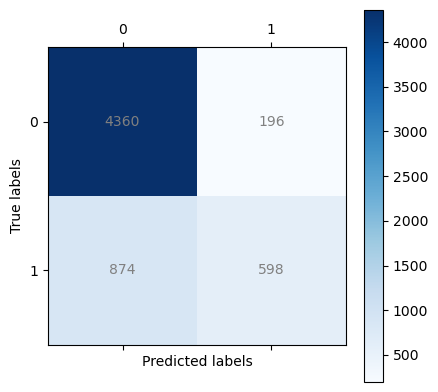

In [21]:
# Plot the confusion matrix of the tuned GuassianNb Classifier
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.matshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Add values to the plot
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='gray')

In [22]:
# Display the plot
plt.show()

In [23]:
# 1. The Accuracy of the simple Bayesian classifier built in this project is around 80% on the test set, with room for optimization.
# 2. The report shows that the test set <=50K has 22,654 samples, while >50K has 7,508 samples. There is a big difference between the two, which may affect the accuracy.